In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.covariance import EmpiricalCovariance
!pip install pyod
from pyod.models.hbos import HBOS


     |████████████████████████████████| 112kB 6.7MB/s 
  Created wheel for pyod: filename=pyod-0.8.8-cp37-none-any.whl size=116967 sha256=f40f8fcefb9a2553e6aa5a835ebdcf8ab822a5dce34dce295a5da3ad3b4ece8d
  Stored in directory: /root/.cache/pip/wheels/54/dd/36/a12fa930455b7c38902f2dbf737175421ad30436e47ac5b24d
Successfully built pyod


In [5]:
def process_data(data):
  pca = PCA(n_components = 1)
  return pca.fit_transform(data)

In [6]:
def plot_original_data(data):
  plt.figure(figsize = (12, 2))
  plt.plot(data, np.zeros_like(X) + 0, 'x')
  plt.yticks([])
  plt.show()

In [7]:
def execute_data(data):
  clf = EmpiricalCovariance()
  clf.fit(data)
  clfc = clf.score(data)
  clf2 = HBOS()
  clf2.fit(data)
  clf2c = clf2.decision_function(data).mean()

  fig, ax = plt.subplots(2, figsize = (12, 4))
  for x in data:
      ax[0].plot(x, 0, 'bx' if clf.score(x) > clfc else 'rx')
      ax[0].set_title('Max likelihood')
      ax[0].set(xlabel = 'PCA feature')
      ax[0].set_yticks([])
      ax[1].plot(x, 0, 'bx' if clf2.decision_function(np.reshape(x, (-1, 1))) < clf2c else 'rx')
      ax[1].set_title('Histogram-based')
      ax[1].set(xlabel = 'PCA feature')
      ax[1].set_yticks([])
  plt.tight_layout()
  plt.show()

In [12]:
data1 = pd.read_csv('./drive/MyDrive/creditcard.csv').iloc[:1000]

In [13]:
X = process_data(data1)

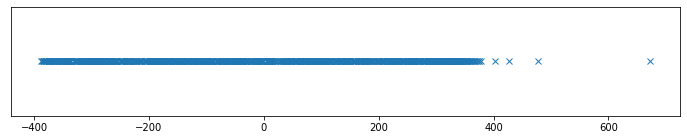

In [14]:
plot_original_data(X)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to resha

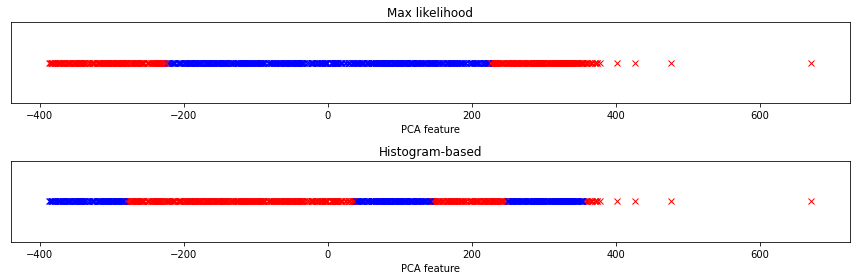

In [15]:
execute_data(X)

In [18]:
data2 = pd.read_csv('./drive/MyDrive/Mall_Customers.csv')
data2=data2.drop('CustomerID',axis=1)
data2=data2.rename(columns={
 'Annual Income (k$)':'Income',
 'Spending Score (1–100)':'Spend_Score'})
data2=pd.get_dummies(data2)

In [19]:
X = process_data(data2)

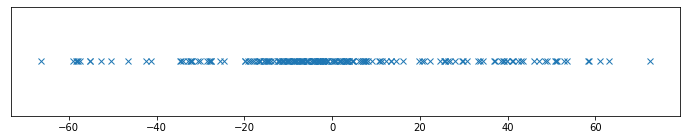

In [20]:
plot_original_data(X)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to resha

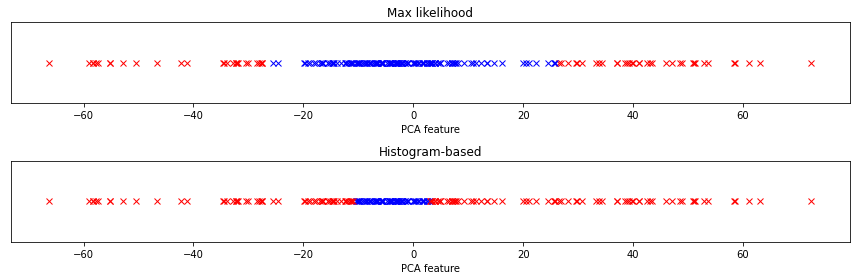

In [21]:
execute_data(X)